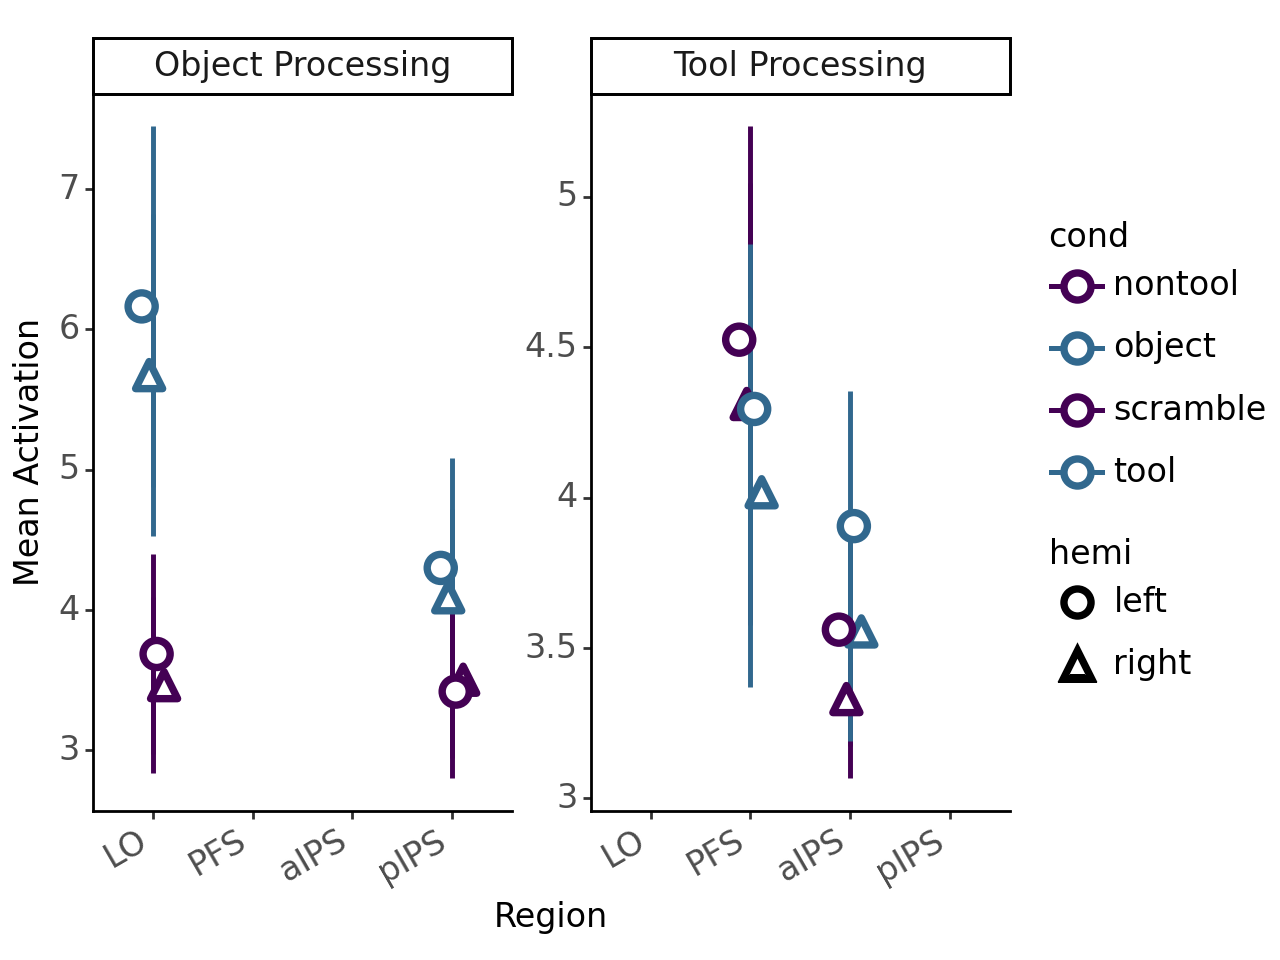

In [3]:
# Combined ROI - Experiment 1 and 2
import pandas as pd
import numpy as np
from plotnine import *

# Load and process experiment 1 data
exp1_data = pd.read_csv("results/selectivity/selectivity_summary.csv")
exp1_filtered = exp1_data[(exp1_data['group'] == 'control') & 
                         (exp1_data['roi'].isin(['LO', 'pIPS'])) &
                         (exp1_data['hemi'].isin(['left', 'right']))]

# Calculate summary statistics for exp1
exp1_summary = exp1_filtered.groupby(['hemi', 'roi', 'cond'])['mean_act'].agg(['mean', 'std']).reset_index()
exp1_summary['experiment'] = 'Object Processing'

# Load and process experiment 2 data
exp2_data = pd.read_csv("results/tools/selectivity/selectivity_summarytoolloc.csv")
exp2_filtered = exp2_data[exp2_data['sub'].str.contains('spaceloc') & 
                         exp2_data['roi'].isin(['PFS', 'aIPS']) &
                         exp2_data['hemi'].isin(['left', 'right'])]

# Calculate summary statistics for exp2
exp2_summary = exp2_filtered.groupby(['hemi', 'roi', 'cond'])['mean_act'].agg(['mean', 'std']).reset_index()
exp2_summary['experiment'] = 'Tool Processing'

# Combine datasets
# Create Region_order categorical variable for proper ordering
combined_summary['Region_order'] = pd.Categorical(
    combined_summary['roi'],
    categories=['LO', 'PFS', 'aIPS', 'pIPS'],
    ordered=True
)

# Modify plot code
plot = (ggplot(combined_summary, 
               aes(x='Region_order', y='mean', color='cond', shape='hemi'))
        + geom_linerange(aes(ymin='mean-std', ymax='mean+std'), size=1)
        + geom_point(size=4, fill='white', stroke=1.5, position=position_dodge(width=0.3))
        + theme_classic()
        + facet_wrap('~ experiment', scales='free_y')
        + scale_color_manual(values={'object': '#31688E', 'scramble': '#440154',
                                   'tool': '#31688E', 'nontool': '#440154'})
        + theme(text=element_text(size=12),
                axis_text_x=element_text(angle=30, hjust=1))
        + labs(x='Region', y='Mean Activation'))

print(plot)

In [ ]:
# FC

In [ ]:
# PPI

In [ ]:
# Subtraction

In [ ]:
# GCA

In [ ]:
# Network